In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('excellent.csv')

In [3]:
df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [42]:
df.columns

Index(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Weight',
       'Item_Sugar_Content', 'Item_Visibility', 'Item_Type', 'Item_Price',
       'Store_Start_Year', 'Store_Size', 'Store_Location_Type', 'Store_Type',
       'Item_Store_Returns'],
      dtype='object')

In [4]:
df.info

<bound method DataFrame.info of      Item_ID      Store_ID       Item_Store_ID  Item_Weight  \
0      DRA12  BABATUNJI010  DRA12_BABATUNJI010        11.60   
1      DRA12  BABATUNJI013  DRA12_BABATUNJI013        11.60   
2      DRA12  BABATUNJI017  DRA12_BABATUNJI017        11.60   
3      DRA12  BABATUNJI018  DRA12_BABATUNJI018        11.60   
4      DRA12  BABATUNJI035  DRA12_BABATUNJI035        11.60   
...      ...           ...                 ...          ...   
4985   NCZ54  BABATUNJI019  NCZ54_BABATUNJI019          NaN   
4986   NCZ54  BABATUNJI027  NCZ54_BABATUNJI027          NaN   
4987   NCZ54  BABATUNJI045  NCZ54_BABATUNJI045        14.65   
4988   NCZ54  BABATUNJI046  NCZ54_BABATUNJI046        14.65   
4989   NCZ54  BABATUNJI049  NCZ54_BABATUNJI049        14.65   

     Item_Sugar_Content  Item_Visibility    Item_Type  Item_Price  \
0             Low Sugar         0.068535  Soft Drinks      357.54   
1             Low Sugar         0.040912  Soft Drinks      355.79   
2   

In [5]:
df.shape

(4990, 13)

In [6]:
df.isnull().sum()

Item_ID                   0
Store_ID                  0
Item_Store_ID             0
Item_Weight             802
Item_Sugar_Content        0
Item_Visibility           0
Item_Type                 0
Item_Price                0
Store_Start_Year          0
Store_Size             1450
Store_Location_Type       0
Store_Type                0
Item_Store_Returns        0
dtype: int64

In [7]:
df['Item_Weight'].fillna(value = df['Item_Weight'].mean(), inplace=True)
df['Store_Size'].fillna(value = df['Store_Size'].mode(), inplace=True)
df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,Medium,Cluster 3,Grocery Store,709.08
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [8]:
product = df.groupby('Item_Type')['Item_Store_Returns'].sum()
product.idxmax()

'Fruits and Vegetables'

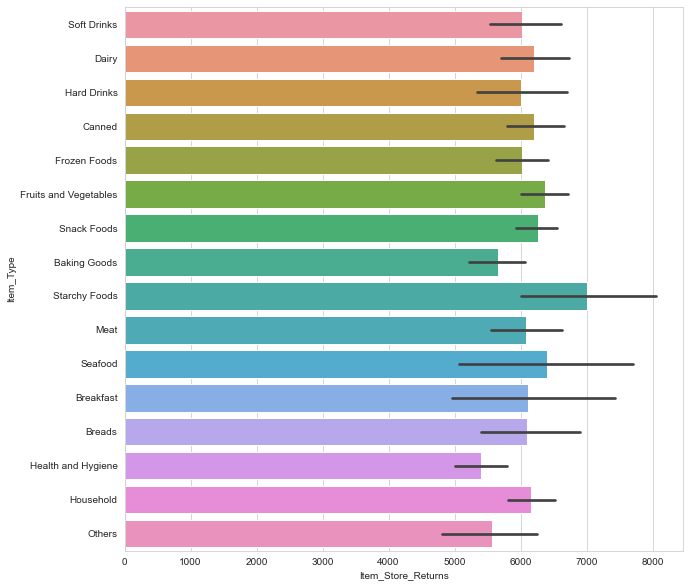

In [47]:
sns.barplot( y = 'Item_Type', x = 'Item_Store_Returns', data = df)
plt.rcParams['figure.figsize'] = 15, 20
plt.show()

In [13]:
Sir, i dont know why this is given me a contrary result from the code and graph with the same data? 

In [9]:
df.Store_ID.nunique()

10

In [11]:
st = df.groupby('Store_ID')['Item_Store_Returns'].sum()

In [12]:
print(st.idxmax())

BABATUNJI027


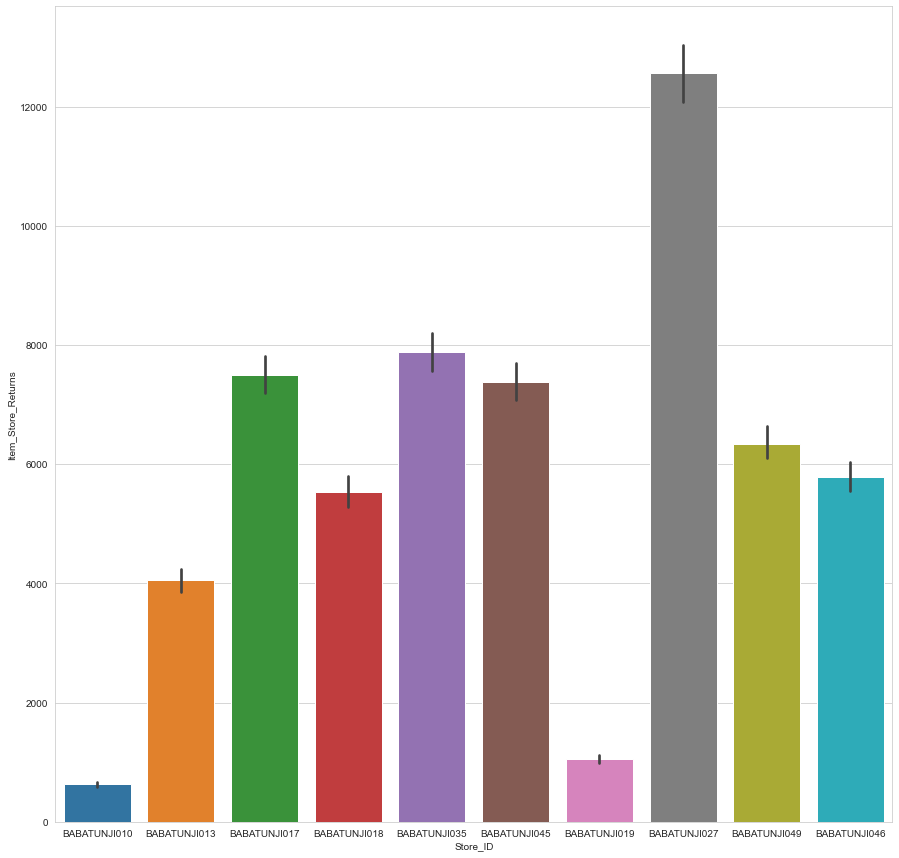

In [22]:
sns.barplot(y = 'Item_Store_Returns', x = 'Store_ID', data = df)
plt.rcParams['figure.figsize'] = [10,25]
plt.show()

In [ ]:
The result shows Babatunji027 store has the highest Item store returns compare to other stores while Babatunji store has lowest item store returns

In [58]:
bab = df[df['Store_ID'] == 'BABATUNJI027']
bab.groupby('Item_Type')['Item_Store_Returns'].sum().idxmax()

'Fruits and Vegetables'

In [13]:
for store in df['Store_ID'].unique():
    a = df[df['Store_ID'] == store].groupby('Item_Type')['Item_Store_Returns'].sum().idxmax()
    b = df[df['Store_ID'] == store].groupby('Item_Type')['Item_Store_Returns'].sum().idxmin()
    print(f'in store{store}, the highest profit was on {a} product')
    print(f'in store{store}, the lowest profit was on {b} product\n')

in storeBABATUNJI010, the highest profit was on Household product
in storeBABATUNJI010, the lowest profit was on Seafood product

in storeBABATUNJI013, the highest profit was on Snack Foods product
in storeBABATUNJI013, the lowest profit was on Seafood product

in storeBABATUNJI017, the highest profit was on Fruits and Vegetables product
in storeBABATUNJI017, the lowest profit was on Seafood product

in storeBABATUNJI018, the highest profit was on Snack Foods product
in storeBABATUNJI018, the lowest profit was on Breakfast product

in storeBABATUNJI035, the highest profit was on Snack Foods product
in storeBABATUNJI035, the lowest profit was on Seafood product

in storeBABATUNJI045, the highest profit was on Fruits and Vegetables product
in storeBABATUNJI045, the lowest profit was on Breakfast product

in storeBABATUNJI019, the highest profit was on Snack Foods product
in storeBABATUNJI019, the lowest profit was on Starchy Foods product

in storeBABATUNJI027, the highest profit was on 

In [ ]:
 Babatunji027 store who has the highest item store return, realised more money on Fruits and vegetables product 
and realised lowest returns on seafood product. four stores made highest return on Fruit and vegetables product
while, five stores made more return on snack food product and only single store made more profit on Household product.
Meanwhile, six (6) stores had lowest returns on seafood product, three(3) stores made lowest return on breakfast product and 
one(1) store on Starchy food product.

In [14]:
location = df.groupby('Store_Location_Type')['Item_Store_Returns']
location.sum().idxmax()

'Cluster 2'

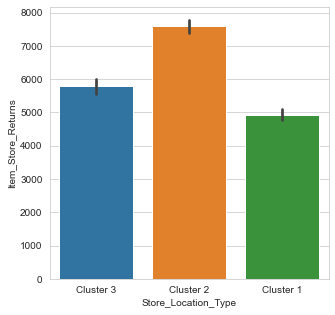

In [29]:
sns.barplot(y = 'Item_Store_Returns', x = 'Store_Location_Type', data = df)
plt.rcParams['figure.figsize'] = [15,20]
plt.show()

In [49]:
## Store in cluster 2 made more profit follow by cluster 3 and cluster 1 made least

In [15]:
df['Store_Age'] = 2022 - df['Store_Start_Year']
df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns,Store_Age
0,DRA12,BABATUNJI010,DRA12_BABATUNJI010,11.6,Low Sugar,0.068535,Soft Drinks,357.54,2005,Medium,Cluster 3,Grocery Store,709.08,17
1,DRA12,BABATUNJI013,DRA12_BABATUNJI013,11.6,Low Sugar,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69,28
2,DRA12,BABATUNJI017,DRA12_BABATUNJI017,11.6,Low Sugar,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69,8
3,DRA12,BABATUNJI018,DRA12_BABATUNJI018,11.6,Low Sugar,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23,6
4,DRA12,BABATUNJI035,DRA12_BABATUNJI035,11.6,Ultra Low Sugar,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77,11


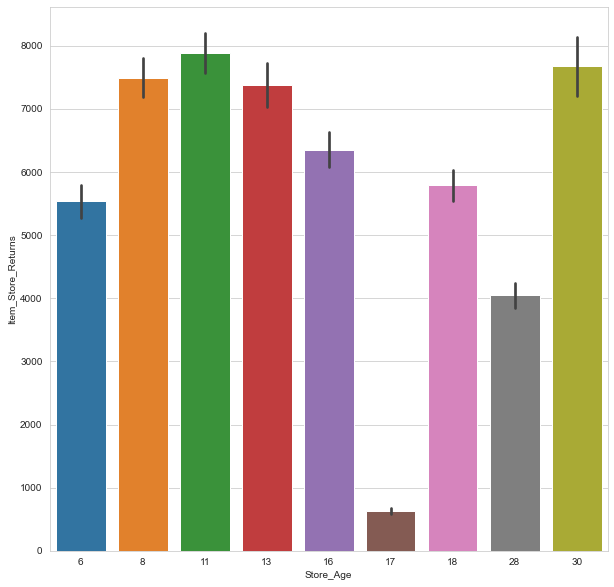

In [21]:
sns.barplot(y = 'Item_Store_Returns', x = 'Store_Age', data = df)
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [ ]:
it shows the item store return its not the function of the store age

In [20]:
product = df.groupby('Store_Size')['Item_Store_Returns'].sum()
print(product.idxmax())

Medium


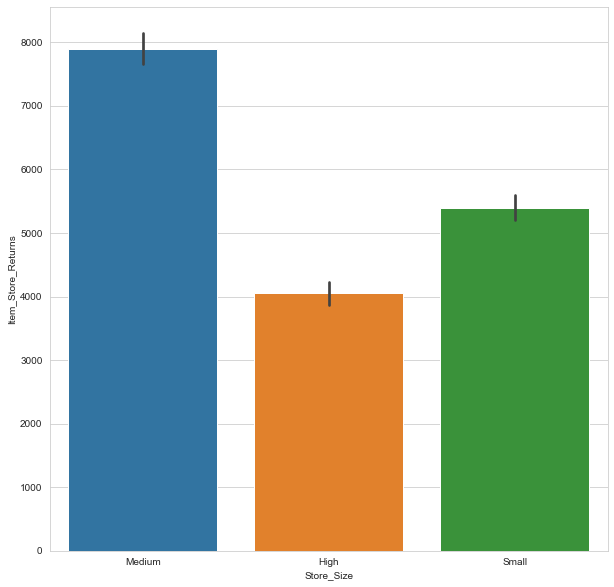

In [27]:
sns.barplot(y = 'Item_Store_Returns', x = 'Store_Size', data = df)
plt.show()

In [42]:
## conclusion

In [ ]:
from my analysis above, it was affirmed that some product had much more returns than other, which has earlier stated above and two top food products
with highest store returns were vegetables and fruits product, and snacks food product, while the food product with least store returns were 
seafood product and breakfast food product which can be deduced from all the store except a store with least store return in starch food product.
It was also discovered that medium store size has much more item store returns, follow by small store size, while the high store size realized 
the least item store returns.
Furthermore, the store location type in cluster 2 had much more item store return, follow by the store location type in cluster 3 while the 
store location type in cluster 2 has the lowest item store returns.
Moreover, item store return was not the function of the store age.
In conclusion, I hereby recomend based on the analysis above that the new store should be a medium store size or at least a small store size and
be located in cluster 2 store location type and cluster3 store location type can also be fairly considered in case that of cluster2
is unavailable. It is also highly recommended that Vegetables and Fruits food product, and Snacks food Product should also be considered as 
items type.